# WeRateDogs of Twitter
The obejctive is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

# 1. Questions
- How does the rating distribution look like?
- Which type of dog gets the highest ratings?
- Which dog breed gets the most favourite-likes?
- Which dog breed gets the most retweets?

# 2. Wrangle
1. Data Gathering
1. Data Assessment
1. Data Cleaning

## 2.1 Data Gathering
- WeRateDogs account data from uc .csv (df_account_data)
- Extra info API data from Twitter (df_tw)
- Image predictions from uc server (df_images)

In [131]:
import pandas as pd
import numpy as np
import requests 
import tweepy 
import json 
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# account data
df_account_data = pd.read_csv('twitter-archive-enhanced.csv')

# Twitter stats API
tw_keys = pd.read_csv('twitter_keys.csv')
consumer_key = tw_keys.twitter_key.values[0]
consumer_secret = tw_keys.twitter_key.values[1]
access_token = tw_keys.twitter_key.values[2]
access_secret = tw_keys.twitter_key.values[3]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_account_data.tweet_id.values
len(tweet_ids)

api.get_status(tweet_id, tweet_mode='extended')

Status(_api=<tweepy.api.API object at 0x7fb09917a5e0>, _json={'created_at': 'Sun Nov 15 22:32:08 +0000 2015', 'id': 666020888022790149, 'id_str': '666020888022790149', 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj', 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fi

In [36]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        # print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
print(fails_dict)

# Read json file line by line into a pandas DataFrame & extract id, favourite_count and retweet_count
df_tw = pd.read_json('tweet_json.txt', lines=True)
df_tw = df_tw[['id', 'favorite_count', 'retweet_count']]

# image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')



Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Fail
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Fail
Success
Success
Success
Success
Success
Success
Success
Success

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


## 2.2 Data Assessment

In [204]:
# visual assessment of account data
df_account_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [209]:
# visual assessment - look in a spreadsheet program
df_account_data.to_csv('account_data.csv')

### Visual Inspection Findings 

**df_account_data**
_Quality Issues_
- Validity issue in the name column, where a is a name.
- Validity issue with float ratings result in faulty numbers in rating_numerator column
- Validity issue dog stage from text is missing in the dog_stage column
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 

_Tidyness Issues_
- The variable dog stage can be found in different columns
- Retweet data is found in the tweet table

The four main data quality dimensions are:

- **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

In [12]:
# programmatic assessment account data
df_account_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [249]:
# programmatic assessment account data
df_account_data[df_account_data.retweeted_status_id.notnull() == True]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [39]:
# programmatic assessment account data
df_account_data.describe()[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [148]:
# programmatic assessment account data
df_account_data.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [149]:
# programmatic assessment account data
df_account_data.tweet_id.nunique()

2356

In [40]:
# programmatic assessment account data
df_account_data.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [44]:
# programmatic assessment account data
df_account_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

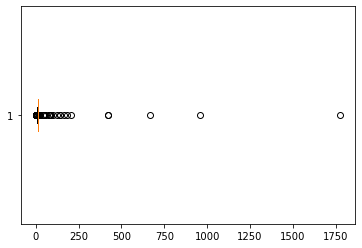

In [74]:
plt.boxplot(df_account_data.rating_numerator, vert = False);


In [42]:
# programmatic assessment account data
df_account_data.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [43]:
# programmatic assessment account data
df_account_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

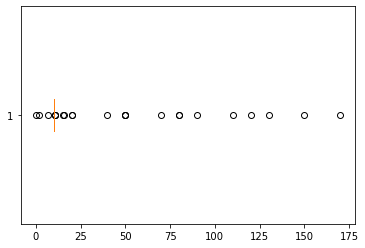

In [76]:
plt.boxplot(df_account_data.rating_denominator, vert = False);

In [205]:
df_account_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [208]:
df_account_data[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only eve...,13,10
1,This is Tilly. She's just checking pup on you....,13,10
2,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,This is Darla. She commenced a snooze mid meal...,13,10
4,This is Franklin. He would like you to stop ca...,12,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,Here is a very happy pup. Big fan of well-main...,9,10
2354,This is a western brown Mitsubishi terrier. Up...,7,10


### Programmatics Inspection Findings

**df_account_data**
_Quality Issues_
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- The variable dog stage can be found in different columns
- Retweet data is found in the tweet table

### Findings Summary df_account_data
**df_account_data**
_Quality Issues_
- Validity issue in the name column, where a is a name.
- Validity issue with float ratings result in faulty numbers in rating_numerator column
- Validity issue dog stage from text is missing in the dog_stage column
- Accuracy issue with None in the name column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id 
- Validity numerator up to 1776 valid?
- Validity issue denominator 0-170, should be 10 (right?)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp

_Tidyness Issues_
- All data from the observational unit (the tweet) is in one table
- Retweet data is found in the tweet table
- The variable dog stage can be found in different columns

In [45]:
# visual assessment - look in a spreadsheet program
df_tw.to_csv('tweet_data.csv') # fine

In [46]:
# programmatic assessment tweet data
df_tw.info() # fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   favorite_count  2328 non-null   int64
 2   retweet_count   2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [51]:
# programmatic assessment tweet data
df_tw.describe()[['favorite_count', 'retweet_count']].round() # fine
# no comment

,favorite_count,retweet_count
count,2328.0,2328.0
mean,7405.0,2631.0
std,11501.0,4451.0
min,0.0,1.0
25%,1288.0,534.0
50%,3212.0,1230.0
75%,9068.0,3053.0
max,152667.0,75568.0


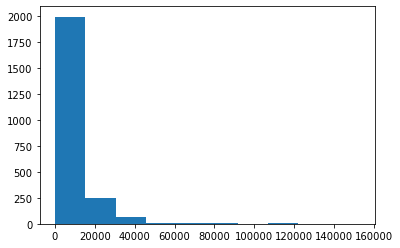

In [62]:
# programmatic assessment tweet data
plt.hist(df_tw.favorite_count);


In [79]:
# programmatic assessment tweet data
df_tw.favorite_count.sort_values()

999          0
544          0
439          0
186          0
187          0
         ...  
1055    112895
129     114076
517     117882
397     130250
1015    152667
Name: favorite_count, Length: 2328, dtype: int64

In [78]:
# programmatic assessment tweet data
df_tw.favorite_count.value_counts()

0        163
405        4
409        4
1584       3
2591       3
        ... 
21069      1
4687       1
10832      1
25169      1
11912      1
Name: favorite_count, Length: 1972, dtype: int64

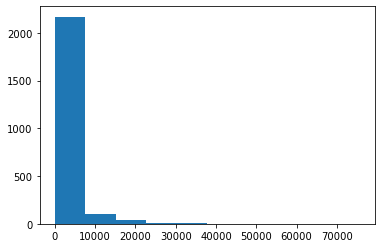

In [80]:
# programmatic assessment tweet data
plt.hist(df_tw.retweet_count);


In [81]:
# programmatic assessment tweet data
df_tw.retweet_count.sort_values()

279         1
1271        2
262         2
328         2
109         3
        ...  
65      39646
397     42556
517     55091
1055    56242
1015    75568
Name: retweet_count, Length: 2328, dtype: int64

In [82]:
# programmatic assessment tweet data
df_tw.retweet_count.value_counts()

41       5
1038     5
547      5
51       5
112      5
        ..
6100     1
27878    1
4063     1
1438     1
2058     1
Name: retweet_count, Length: 1680, dtype: int64

### Findings Summary df_tw
_Tidyness_
- Tidyness issue, all tweet data in the same table

In [ ]:
# visual assessment image predictions
# already present as file - opened in spreadsheet program

In [83]:
# programmatic assessment image prediction
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
# programmatic assessment image prediction
image_predictions.p1_conf.sort_values(ascending=False).round(2)

106     1.00
1299    1.00
1229    1.00
149     1.00
1372    1.00
        ... 
246     0.07
1370    0.06
1093    0.06
136     0.06
38      0.04
Name: p1_conf, Length: 2075, dtype: float64

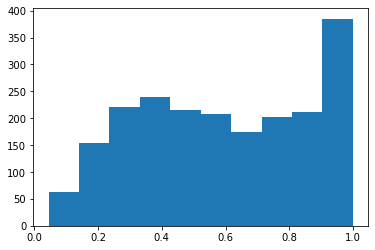

In [93]:
plt.hist(image_predictions.p1_conf);

In [89]:
# programmatic assessment image prediction
image_predictions.p2_conf.sort_values(ascending=False).round(2)

986     0.49
1756    0.47
1514    0.46
232     0.46
72      0.45
        ... 
1372    0.00
230     0.00
1229    0.00
1299    0.00
106     0.00
Name: p2_conf, Length: 2075, dtype: float64

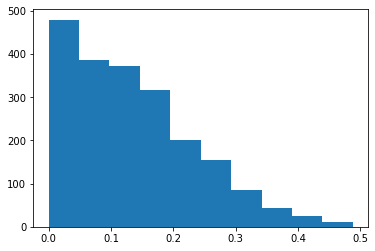

In [94]:
plt.hist(image_predictions.p2_conf);

In [91]:
# programmatic assessment image prediction
image_predictions.p3_conf.sort_values(ascending=False).round(2)

1071    0.27
1080    0.27
97      0.27
123     0.26
1613    0.25
        ... 
1299    0.00
1760    0.00
1906    0.00
149     0.00
106     0.00
Name: p3_conf, Length: 2075, dtype: float64

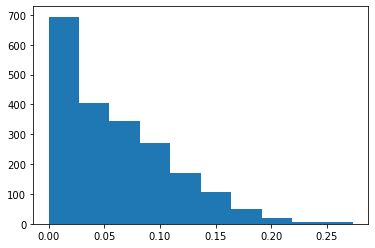

In [95]:
plt.hist(image_predictions.p3_conf);

In [108]:
# programmatic assessment image prediction
image_predictions.p1[image_predictions.p1_dog == True].value_counts()
                           
                           

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
Scotch_terrier          1
clumber                 1
Japanese_spaniel        1
groenendael             1
standard_schnauzer      1
Name: p1, Length: 111, dtype: int64

In [109]:
# programmatic assessment image prediction
image_predictions.p2[image_predictions.p2_dog == True].value_counts()
     

Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
standard_schnauzer        1
komondor                  1
Bernese_mountain_dog      1
Japanese_spaniel          1
EntleBucher               1
Name: p2, Length: 113, dtype: int64

### Findings Summary image_prediction
**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id
- Consistency issue in p1, p2 and p3 columns, first letter
- Consistency issue in p1, p2 and p3 columns, len - round()
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters
- Treashold for true?

_Tidyness Issues_
- img_num unnecessary column
- The table also contains daat from the same observationa unit (the tweet) and should therefore be in the same table as the account_data 
- The table could have been arranged differently with p, p_conf and p_dog as variables

### Findings Summary
**df_account_data**
_Quality Issues_
- Validity issue in the name column, where a is a name. (fix? No)
- Validity issue with float ratings result in faulty numbers in rating_numerator column (fix)
- Validity issue dog stage from text is missing in the dog_stage column (fix)
- Accuracy issue with None in the name column (fix? No)
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data) (fix first Upper letter)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id (fix)
- Validity numerator up to 1776 valid? (dont have information to fix)
- Validity issue denominator 0-170, should be 10 (right?)(dont have information to fix)
- Accuracy issue with varying denominator
- Accuracy issue with very high std in numerator
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str (fix)
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp (fix)

_Tidyness Issues_
- All data from the observational unit (the tweet) is in one table 
- Retweet data is found in the tweet table (fix)
- The variable dog stage can be found in different columns (fix)

**df_tw**
_Tidyness_
- Tidyness issue, all tweet is not data in the same table (fix)

**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id (fix)
- Consistency issue in p1, p2 and p3 columns, first letter (fix)
- Consistency issue in p1, p2 and p3 columns, len - round() (fix)
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters (fix)
- Treashold for true? (dont have information to fix)

_Tidyness Issues_
- img_num unnecessary column (dont fix, not so serious issue)
- The table also contains daat from the same observationa unit (the tweet) and should therefore be in the same table as the account_data (fix)
- The table could have been arranged differently with p, p_conf and p_dog as variables (dont fix)

### Choosing  at least 8 quality issues and 2 tidyness issues to work with
**df_account_data**

_Quality Issues_
- Validity issue with float ratings result in faulty numbers in rating_numerator column
- Validity issue dog stage from text is missing in the dog_stage column
- Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data) (fix first Upper letter)
- Consistency issue with with formats in in_reply_to_status and in_reply_to_user_id (fix)
- Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str (fix)
- Consistency issue with datatype for timestamp and retweeted_status_timestamp which is object but should be timestamp (fix)

_Tidyness Issues_
- Retweet data is found in the tweet table (fix)
- The variable dog stage can be found in different columns (fix)

**df_tw**
_Tidyness_
- Tidyness issue, all tweet is not data in the same table (fix)

**image_predictions**

_Quality Issues_
- Consitency datatype tweet_id (fix)
- Consistency issue in p1, p2 and p3 columns, first letter (fix)
- Consistency issue in p1, p2 and p3 columns, len - round() (fix)
- Consistency p1_dog, p2_dog, p3_dog boolean in capital letters (fix)

_Tidyness Issues_
- The table also contains data from the same observational unit (the tweet) and should therefore be in the same table as the account_data (fix)

## 2.3 Data Cleaning

1. Create a copy of your data
1. Addressing quality completeness issues (missing data) first
1. Addressing tidyness issues second
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table.
4. Adressing the rest of the quality issues third
- Adressing validity
- Adressing accuracy
- Adressing consistency


### 2.3.1 Create Copies

In [210]:
df_account_data_clean = df_account_data.copy()
df_tw_clean = df_tw.copy()
image_predictions_clean = image_predictions.copy()

### 2.3.1 Missing Data
I choosed to now work with the missing data since I dont have any information of how it can be retrieved, treated or recovered.

### 2.3.2 Tidyness Issues

#### Define
`The variable dog stage can be found in different columns (fix)`

Melt and unpivot the columns dog_stages into rows in a new column called dog_stage.

In [334]:
df_account_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code

In [38]:
#
df_account_data_clean = pd.melt(df_account_data_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'] , value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'dog_stage')
df_account_data_clean = df_account_data_clean.drop(labels = 'value', axis = 1)




#### Test

In [39]:
df_account_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo


In [242]:
df_account_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   9424 

#### Define
`Tidyness issue, all tweet data is not in the same table`

Concat df_account_data and df_tw.

#### Code

In [40]:
df_twitter_data = pd.concat([df_account_data_clean, df_tw_clean], axis = 1)
df_twitter_data_clean = df_twitter_data.copy()

#### Test

In [41]:
df_twitter_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,8.924206e+17,35396.0,7480.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,8.921774e+17,30637.0,5550.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,8.918152e+17,23044.0,3672.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,8.916896e+17,38700.0,7654.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,8.913276e+17,36968.0,8256.0


In [244]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   9424 

#### Define
`Retweet data is found in df_account_data_clean`

Remove (drop) the retweet data from the clean table.

#### Code

In [463]:
# remove later
# df_account_data_clean.drop(labels = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [200]:
# df_account_data_clean.head() # columns dropped

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.3.3 Quality Issues

#### Define
`Validity`

Remove non orgiginal (retweets or replies) tweets from the data set and also remove all tweets <= 1st Aug 2017.

In [326]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    8388 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   8388 non-null   datetime64[ns, UTC]
 4   source                      8388 non-null   object             
 5   text                        8388 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               8376 non-null   object             
 10  rating_numerator            8388 non-null   int64           

#### Code 

In [42]:
# remove retweets and replies
col_list = ['retweeted_status_id', 'in_reply_to_status_id']

for col_name in col_list:
    df_twitter_data_clean = df_twitter_data_clean[df_twitter_data_clean[col_name].isnull() == True]
    

In [43]:
# convert dtype from object to datetime
df_twitter_data_clean.timestamp = pd.to_datetime(df_twitter_data_clean.timestamp)

In [44]:
df_twitter_data_clean.timestamp.dt.strftime('%Y-%m-%d') > '2017-08-01'

0       False
1       False
2       False
3       False
4       False
        ...  
9419    False
9420    False
9421    False
9422    False
9423    False
Name: timestamp, Length: 8388, dtype: bool

In [340]:
# remove tweets <= 2017-08-01 - We dont have data beyond 2017-08-01

#### Test

In [45]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    8388 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   8388 non-null   datetime64[ns, UTC]
 4   source                      8388 non-null   object             
 5   text                        8388 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               8376 non-null   object             
 10  rating_numerator            8388 non-null   int64           

In [373]:
df_twitter_data_clean.timestamp.min(), df_twitter_data_clean.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

#### Define
`Validity issue with float ratings result in faulty numbers in rating_numerator column`

Extract correct numbers from the text using regex into rating_numerator. 

In [242]:
df_twitter_data_clean.iloc[41].rating_numerator

'13.5'

#### Code 

In [239]:
rating = df_twitter_data_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_twitter_data_clean.rating_numerator = rating.rating_numerator
df_twitter_data_clean.rating_denominator = rating.rating_denominator

#### Test

In [240]:
df_twitter_data_clean.iloc[41].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [241]:
df_twitter_data_clean.iloc[41].rating_numerator

'13.5'

#### Define
`Validity issue with dog_stage not well documented`

Extract correct dog_stage from the text using regex into dog_stage. 

In [254]:
df_twitter_data.groupby('dog_stage').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,id,favorite_count,retweet_count
dog_stage,,,,,,,,,,,,,,,,
doggo,2356,78,78,2356,2356,2356,181,181,181,2297,2356,2356,2356,2329,2329,2329
floofer,2356,78,78,2356,2356,2356,181,181,181,2297,2356,2356,2356,0,0,0
pupper,2356,78,78,2356,2356,2356,181,181,181,2297,2356,2356,2356,0,0,0
puppo,2356,78,78,2356,2356,2356,181,181,181,2297,2356,2356,2356,0,0,0


#### Code 

In [246]:
# find method - -1 = doesnt find, it find return the index of the start of the string
df_twitter_data.text.str.find('doggo')

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9419   -1
9420   -1
9421   -1
9422   -1
9423   -1
Name: text, Length: 9424, dtype: int64

In [291]:
# extract 
df_twitter_data_clean['dog_stages'] = df_twitter_data_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = False)

#### Test

In [281]:
df_twitter_data_clean.text[10]

'This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme'

In [292]:
df_twitter_data_clean['dog_stages'].value_counts()

pupper     960
doggo      320
puppo      116
floofer     16
Name: dog_stages, dtype: int64

#### Define
`Consistency issue with with datatype in id-columns: in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, should be int or str (fix) and retweeted_status_timestamp should be datetime format`

Actually remove these columns, since they now are empty. 

In [374]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    8388 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   8388 non-null   datetime64[ns, UTC]
 4   source                      8388 non-null   object             
 5   text                        8388 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               8376 non-null   object             
 10  rating_numerator            8388 non-null   int64           

#### Code 

In [47]:
# remove unnecessary columns
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] 
df_twitter_data_clean = df_twitter_data_clean.drop(drop_list, axis = 1)

#### Test

In [379]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8388 non-null   int64              
 1   timestamp           8388 non-null   datetime64[ns, UTC]
 2   source              8388 non-null   object             
 3   text                8388 non-null   object             
 4   expanded_urls       8376 non-null   object             
 5   rating_numerator    8388 non-null   int64              
 6   rating_denominator  8388 non-null   int64              
 7   name                8388 non-null   object             
 8   dog_stage           8388 non-null   object             
 9   id                  2069 non-null   float64            
 10  favorite_count      2069 non-null   float64            
 11  retweet_count       2069 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

#### Define
`Consistency issue with name starting with lower letter in name column; such, quite (looks like overwriting of data) (fix first Upper letter)`

Use df_twitter_data_clean.name.str.title() to capitalize the first letter of names.

#### Code 

In [48]:
df_twitter_data_clean.name = df_twitter_data_clean.name.str.title()

#### Test

In [384]:
df_twitter_data_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
9419        None
9420           A
9421           A
9422           A
9423        None
Name: name, Length: 8388, dtype: object

#### Define
`Consistency issue in p1, p2 and p3 columns, first letter (or actually all words) should be capitalized and replace _ with ''.`

For p1, p2 and p3 columns; use .str.title() to capitalize all words and replace('_', ' ', inplace=True)

In [386]:
image_predictions_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

#### Code 

In [87]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.title()


In [88]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_', ' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_', ' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_', ' ')



#### Test

In [412]:
image_predictions_clean.p3

0                 Shetland Sheepdog
1               Rhodesian Ridgeback
2                        Bloodhound
3                Miniature Pinscher
4                          Doberman
                   ...             
2070    German Short-Haired Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2075, dtype: object

#### Define
`Consistency issue in p1_conf, p2_conf and p3_conf columns, the lenght should be equal and in human readable format`

For p1_conf, p2_conf and p3_conf columns; use .round(2)

In [89]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.47,True,Collie,0.16,True,Shetland Sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.51,True,Miniature Pinscher,0.07,True,Rhodesian Ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.60,True,Malinois,0.14,True,Bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.41,True,Redbone,0.36,True,Miniature Pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


#### Code 

In [51]:
image_predictions_clean.p1_conf = image_predictions_clean.p1_conf.round(2)

In [52]:
image_predictions_clean.p2_conf = image_predictions_clean.p2_conf.round(2)

In [53]:
image_predictions_clean.p3_conf = image_predictions_clean.p3_conf.round(2)


#### Test

In [425]:
image_predictions_clean.p3_conf

0       0.06
1       0.07
2       0.12
3       0.22
4       0.15
        ... 
2070    0.18
2071    0.04
2072    0.03
2073    0.07
2074    0.08
Name: p3_conf, Length: 2075, dtype: float64

#### Define
`Consistency p1_dog, p2_dog, p3_dog boolean in capital letters`

For p1_dog, p2_dog and p3_dog columns; use str.title()

In [54]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.47,True,Collie,0.16,True,Shetland Sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.51,True,Miniature Pinscher,0.07,True,Rhodesian Ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.60,True,Malinois,0.14,True,Bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.41,True,Redbone,0.36,True,Miniature Pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


#### Code 

In [422]:
# It seems like boolean is in capital letters in Numbers and as I would like it from Jupyter Notebook.

#### Test

In [427]:
# None

#### Define
`Change A to None in df_tweeter_data_clean.name`

Use str.replace()

In [432]:
df_twitter_data_clean.name.value_counts()

None         2412
A             220
Charlie        44
Lucy           44
Cooper         40
             ... 
Tino            4
Barney          4
Bonaparte       4
Sid             4
Bertson         4
Name: name, Length: 955, dtype: int64

#### Code 

In [55]:
df_twitter_data_clean.name = df_twitter_data_clean.name.str.replace('A', 'None')


#### Test

In [436]:
df_twitter_data_clean.name.value_counts()

None       2632
Charlie      44
Lucy         44
Oliver       40
Cooper       40
           ... 
Halo          4
Kanu          4
Sierra        4
Severus       4
Bertson       4
Name: name, Length: 954, dtype: int64

### Additional Tidying Issue
#### Define
`Concate, merge or join the two tables to one`

Additional because of practical reasons - and they after all belongs to the same observational unit.

In [432]:
df_twitter_data_clean.name.value_counts()

None         2412
A             220
Charlie        44
Lucy           44
Cooper         40
             ... 
Tino            4
Barney          4
Bonaparte       4
Sid             4
Bertson         4
Name: name, Length: 955, dtype: int64

#### Code 

In [104]:
twitter_archive_master = pd.merge(df_twitter_data_clean, image_predictions_clean, how = 'left', on='tweet_id')



#### Test

In [105]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,8.924206e+17,...,1.0,Orange,0.10,False,Bagel,0.09,False,Banana,0.08,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,8.921774e+17,...,1.0,Chihuahua,0.32,True,Pekinese,0.09,True,Papillon,0.07,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Nonerchie,doggo,8.918152e+17,...,1.0,Chihuahua,0.72,True,Malamute,0.08,True,Kelpie,0.03,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,8.916896e+17,...,1.0,Paper Towel,0.17,False,Labrador Retriever,0.17,True,Spatula,0.04,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,8.913276e+17,...,2.0,Basset,0.56,True,English Springer,0.23,True,German Short-Haired Pointer,0.18,True


In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 8387
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8388 non-null   int64              
 1   timestamp           8388 non-null   datetime64[ns, UTC]
 2   source              8388 non-null   object             
 3   text                8388 non-null   object             
 4   expanded_urls       8376 non-null   object             
 5   rating_numerator    8388 non-null   int64              
 6   rating_denominator  8388 non-null   int64              
 7   name                8388 non-null   object             
 8   dog_stage           8388 non-null   object             
 9   id                  2070 non-null   float64            
 10  favorite_count      2070 non-null   float64            
 11  retweet_count       2070 non-null   float64            
 12  jpg_url             7884 non-null 

In [451]:
twitter_archive_master[twitter_archive_master.timestamp.isnull() == True]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Italian Greyhound,0.18,True,Toy Terrier,0.11,True,Basenji,0.11,True
30,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Toy Terrier,0.15,True,Papillon,0.15,True,Chihuahua,0.14,True
32,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Pembroke,0.37,True,Chow,0.25,True,Pomeranian,0.24,True
36,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Curly-Coated Retriever,0.32,True,Giant Schnauzer,0.29,True,Labrador Retriever,0.17,True
55,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Chesapeake Bay Retriever,0.83,True,Vizsla,0.09,True,Kelpie,0.02,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Prison,0.35,False,Dishwasher,0.11,False,File,0.09,False
1914,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,Black-And-Tan Coonhound,0.85,True,Doberman,0.05,True,Bluetick,0.02,True
1940,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Envelope,0.93,False,Oscilloscope,0.01,False,Paper Towel,0.01,False
2036,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Pembroke,0.99,True,Cardigan,0.00,True,Chihuahua,0.00,True


## Save Clean Data as twitter_archive_master.csv

In [106]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# 3. Analyze
- How does the rating distribution look like?
- Which type of dog gets the highest ratings?
- Which dog breed gets the most favourite-likes?
- Which dog breed gets the most retweets?

In [107]:
df = pd.read_csv('twitter_archive_master.csv')
df_anlze = df.copy()

In [108]:
df.head()['p1']

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

In [109]:
df_anlze.head()['p1']

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

## 3.1 How does the rating distribution look like?

In [95]:
rating = df_anlze.rating_numerator / df_anlze.rating_denominator
df_anlze['rating'] = rating
rating.sort_values().tail(20)

4780      2.700000
586       2.700000
6877      2.700000
2683      2.700000
6694      3.428571
403       3.428571
2500      3.428571
4597      3.428571
6819      7.500000
2625      7.500000
528       7.500000
4722      7.500000
1821     42.000000
3918     42.000000
8112     42.000000
6015     42.000000
4964    177.600000
7061    177.600000
2867    177.600000
770     177.600000
dtype: float64

In [96]:
rating_without_outliers = rating.sort_values()[0:-12]

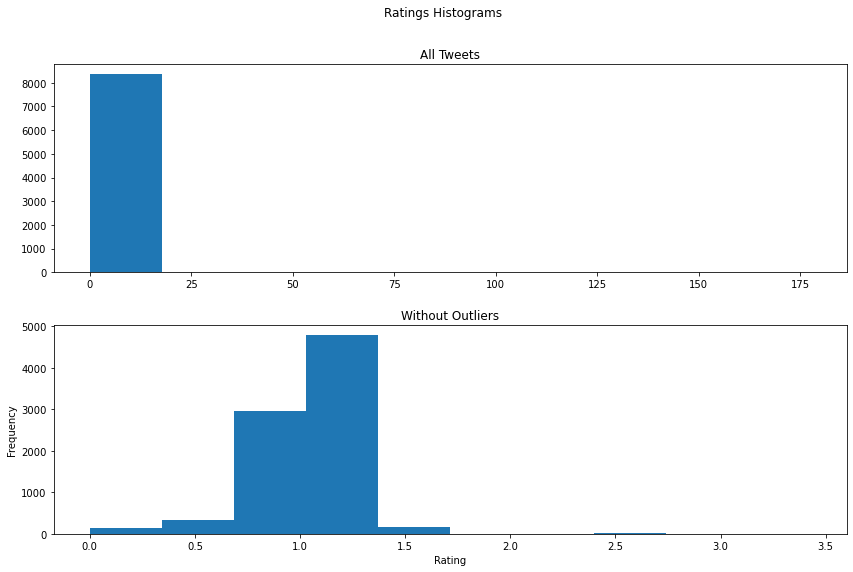

In [195]:
fig, ax = plt.subplots(2, figsize=(12,8))
fig.suptitle('Ratings Histograms')
ax[0].set_title('All Tweets')
ax[1].set_title('Without Outliers')
fig.tight_layout(pad=2.0)

plt.ylabel('Frequency')
plt.xlabel('Rating')
ax[0].hist(rating);
ax[1].hist(rating_without_outliers);

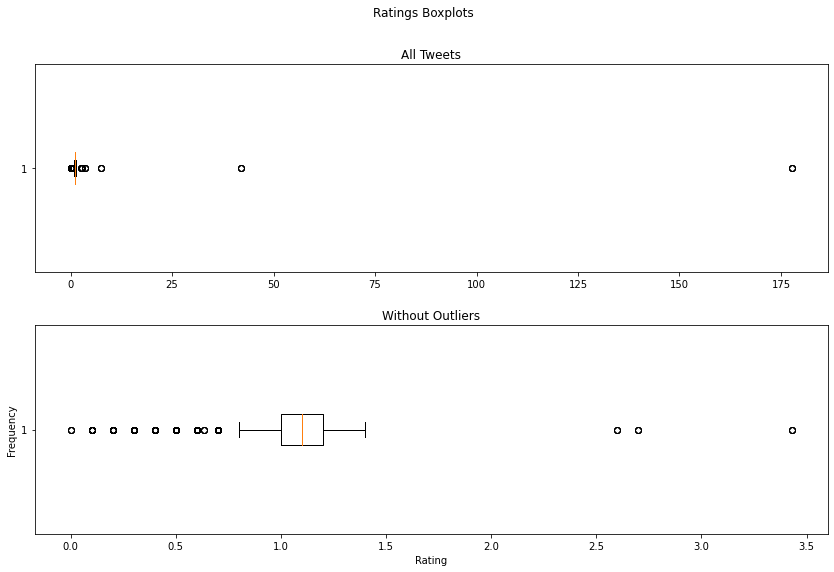

In [201]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
fig.suptitle('Ratings Boxplots')
ax[0].set_title('All Tweets')
ax[1].set_title('Without Outliers')
fig.tight_layout(pad=2.0)

plt.ylabel('Frequency')
plt.xlabel('Rating')


ax[0].boxplot(rating, vert=False);
ax[1].boxplot(rating_without_outliers, vert=False);

## 3.2 Which type of dog gets the highest ratings?

In [85]:
df_anlze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8388 non-null   int64  
 1   tweet_id            8388 non-null   int64  
 2   timestamp           8388 non-null   object 
 3   source              8388 non-null   object 
 4   text                8388 non-null   object 
 5   expanded_urls       8376 non-null   object 
 6   rating_numerator    8388 non-null   int64  
 7   rating_denominator  8388 non-null   int64  
 8   name                8388 non-null   object 
 9   dog_stage           8388 non-null   object 
 10  id                  2070 non-null   float64
 11  favorite_count      2070 non-null   float64
 12  retweet_count       2070 non-null   float64
 13  jpg_url             7884 non-null   object 
 14  img_num             7884 non-null   float64
 15  p1                  7884 non-null   object 
 16  p1_con

In [598]:
# rates - surprisingly its not a‰bout the dog but rather the dogs attributs (Pomeranian, Saluki second, of the dogs)
df_anlze.groupby(['p1'])['rating'].mean().sort_values(ascending = False).head(50)



p1
bow_tie             45.150000
microphone          42.000000
clumber              2.700000
prison               1.400000
pedestal             1.400000
laptop               1.400000
pole                 1.400000
limousine            1.400000
military_uniform     1.400000
hammer               1.300000
bannister            1.300000
restaurant           1.300000
tiger_shark          1.300000
teapot               1.300000
convertible          1.300000
quilt                1.300000
bakery               1.300000
marmot               1.300000
grille               1.300000
syringe              1.300000
cliff                1.300000
padlock              1.300000
revolver             1.300000
upright              1.300000
barbell              1.300000
fountain             1.300000
dough                1.300000
orange               1.300000
canoe                1.300000
loupe                1.300000
snowmobile           1.300000
Pomeranian           1.286842
home_theater         1.260000
Saluki 

In [600]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8388 non-null   int64  
 1   tweet_id            8388 non-null   int64  
 2   timestamp           8388 non-null   object 
 3   source              8388 non-null   object 
 4   text                8388 non-null   object 
 5   expanded_urls       8376 non-null   object 
 6   rating_numerator    8388 non-null   int64  
 7   rating_denominator  8388 non-null   int64  
 8   name                8388 non-null   object 
 9   dog_stage           8388 non-null   object 
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

## 3.3 Which dog breed gets the most favourite-likes?

In [202]:
# dogs with favorite counts
df_anlze.groupby(['p1']).count()['favorite_count'].sort_values(ascending = False).head(10)



p1
Golden Retriever      135
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    53
Chow                   40
Samoyed                40
Pomeranian             38
Toy Poodle             37
Malamute               28
Name: favorite_count, dtype: int64

## 3.4 Which dog breed gets the most retweets?

In [178]:
# dogs with retweet counts
df_anlze.groupby(['p1']).count()['retweet_count'].sort_values(ascending = False).head(10)



p1
Golden Retriever      135
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    53
Chow                   40
Samoyed                40
Pomeranian             38
Toy Poodle             37
Malamute               28
Name: retweet_count, dtype: int64

# 4. Visualization 

In [123]:
df_viz = df_anlze[df_anlze.favorite_count.notnull() & df_anlze.p1.notnull()]
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 0 to 2069
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1944 non-null   int64  
 1   tweet_id            1944 non-null   int64  
 2   timestamp           1944 non-null   object 
 3   source              1944 non-null   object 
 4   text                1944 non-null   object 
 5   expanded_urls       1944 non-null   object 
 6   rating_numerator    1944 non-null   int64  
 7   rating_denominator  1944 non-null   int64  
 8   name                1944 non-null   object 
 9   dog_stage           1944 non-null   object 
 10  id                  1944 non-null   float64
 11  favorite_count      1944 non-null   float64
 12  retweet_count       1944 non-null   float64
 13  jpg_url             1944 non-null   object 
 14  img_num             1944 non-null   float64
 15  p1                  1944 non-null   object 
 16  p1_con

No handles with labels found to put in legend.


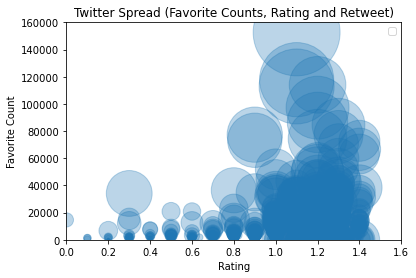

In [177]:
# favorite_counts, retweet_counts, rating, p1 df_anlze.p1
x = (df_anlze.rating_numerator/df_anlze.rating_denominator)
y = df_anlze.favorite_count
size = df_anlze.retweet_count*0.1


# axis formats
plt.axis([0, 1.6, 0, 160000])
plt.xlabel('Rating')
plt.ylabel('Favorite Count')

plt.title('Twitter Spread (Favorite Counts, Rating and Retweet)')
plt.scatter(x, y, s = size, alpha = 0.3)
plt.legend()
plt.show()

No handles with labels found to put in legend.


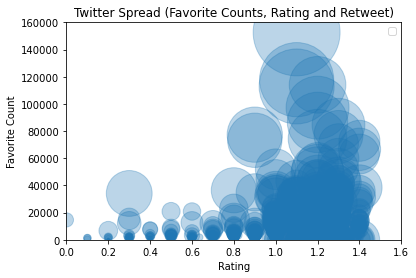

In [177]:
# favorite_counts, retweet_counts, rating, p1 df_anlze.p1
x = (df_anlze.rating_numerator/df_anlze.rating_denominator)
y = df_anlze.favorite_count
size = df_anlze.retweet_count*0.1

# axis formats
plt.axis([0, 1.6, 0, 160000])
plt.xlabel('Rating')
plt.ylabel('Favorite Count')

plt.title('Twitter Spread (Favorite Counts, Rating and Retweet)')
plt.scatter(x, y, s = size, alpha = 0.3)
plt.legend()
plt.show()

Learn more about vizualizations: 
[link](https://www.pythonprogramming.in/create-legend-with-bubble-size-using-numpy-and-matplotlib.html)